# Data Cleaning and Processing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A2_data.xlsx to INF2178_A2_data.xlsx


In [2]:
# Import the data package before further analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# load the xlsx dataset here
mydata = pd.read_excel('INF2178_A2_data.xlsx')

# check the first 10 rows of the dataset
mydata.head(10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=95e719c57b8f4917c1e5c71170a10190572bc4ab0bba37f28af6cfdd2e98da0f
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [3]:
# check the general information of our dataset
mydata.info()

# check the descriptive statistical description of our dataset
mydata.describe()

# look the statistical description of categorical and numerical variables
categorical_stats = mydata.describe()
numerical_stats = mydata.describe()

# show the results
print(categorical_stats)
print(numerical_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB
               _id        LOC_ID         ward      IGSPACE    

In [4]:
# check the missing values of our dataset, and sum-up the null values
mydata.isnull().sum()

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

In [5]:
# Handling with the missing values for 'BLDGNAME',fill the null values with 'Not Available'
mydata['BLDGNAME'].fillna('Not Available', inplace=True)

# Perform again quantitative analysis to understand the dataset's characteristics
sum_stat = mydata.describe(include='all')
print(sum_stat)

# Check the null values again
missing_values_new = mydata.isnull().sum()
missing_values_new

                _id        LOC_ID                LOC_NAME            AUSPICE  \
count   1063.000000   1063.000000                    1063               1063   
unique          NaN           NaN                    1058                  3   
top             NaN           NaN  Blue Bell Academy Inc.  Non Profit Agency   
freq            NaN           NaN                       2                703   
mean     532.000000   8087.888053                     NaN                NaN   
std      307.005972   5151.252693                     NaN                NaN   
min        1.000000   1013.000000                     NaN                NaN   
25%      266.500000   1862.000000                     NaN                NaN   
50%      532.000000   8826.000000                     NaN                NaN   
75%      797.500000  13245.000000                     NaN                NaN   
max     1063.000000  14504.000000                     NaN                NaN   

              ADDRESS    PCODE         

_id            0
LOC_ID         0
LOC_NAME       0
AUSPICE        0
ADDRESS        0
PCODE          0
ward           0
bldg_type      0
BLDGNAME       0
IGSPACE        0
TGSPACE        0
PGSPACE        0
KGSPACE        0
SGSPACE        0
TOTSPACE       0
subsidy        0
cwelcc_flag    0
dtype: int64

In [6]:
# Two columns are not helpful and should be delete (_id, LOC_ID)
colnames = ['_id', 'LOC_ID']
mydata_cleaned = mydata.drop(['_id', 'LOC_ID'], axis=1)

# Show the results
print(mydata_cleaned)

                                               LOC_NAME            AUSPICE  \
0                 Lakeshore Community Child Care Centre  Non Profit Agency   
1               Alternative Primary School Parent Group  Non Profit Agency   
2        Cardinal Leger Child Care Centre (Scarborough)  Non Profit Agency   
3     George Brown - Richmond Adelaide Childcare Centre  Non Profit Agency   
4     Woodland Nursery School (Warden Woods Communit...  Non Profit Agency   
...                                                 ...                ...   
1058       The Neighbourhood Group Downsview Child Care  Non Profit Agency   
1059                               Lawrence Park School  Non Profit Agency   
1060  The Munchkin Manor Daycare & Early Learning Ce...  Non Profit Agency   
1061     Columbus Early Learning Centres - Regina Mundi  Non Profit Agency   
1062                             Brightpath Leslieville  Commercial Agency   

                ADDRESS    PCODE  ward                   bldg_t

# Data Visualization


#### Note: Even this part is not required in this assignment, however, the basic data visualizations can potentially help me to create research questions and one-way ANOVAs later.

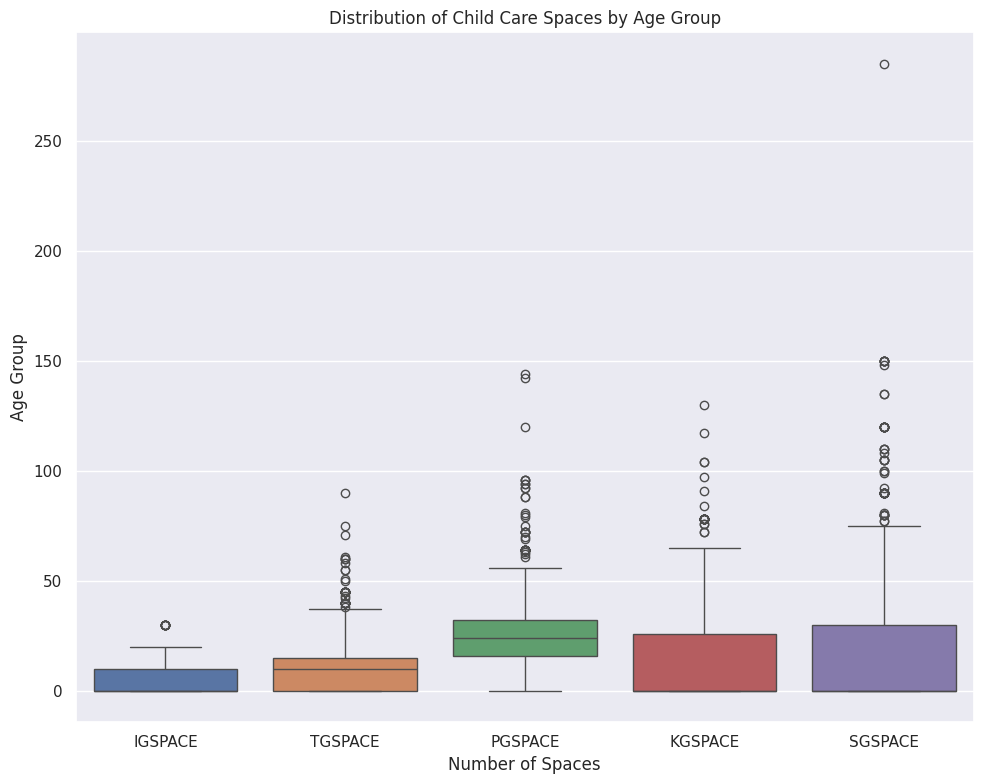

In [7]:
# Setting the aesthetic style of the plots
sns.set(style="darkgrid")

# Examine the categorical variables
# 1. The distribution of Child Care Spaces by Age Group (Boxplot)
# Preparing the figure layout
plt.figure(figsize=(10,8))
sns.boxplot(data=mydata_cleaned[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']])
# Set title
plt.title('Distribution of Child Care Spaces by Age Group')
# Name the x and y labels
plt.xlabel('Number of Spaces')
plt.ylabel('Age Group')
# Set layout to avoid overlapping
plt.tight_layout()
# Display the graph
plt.show()

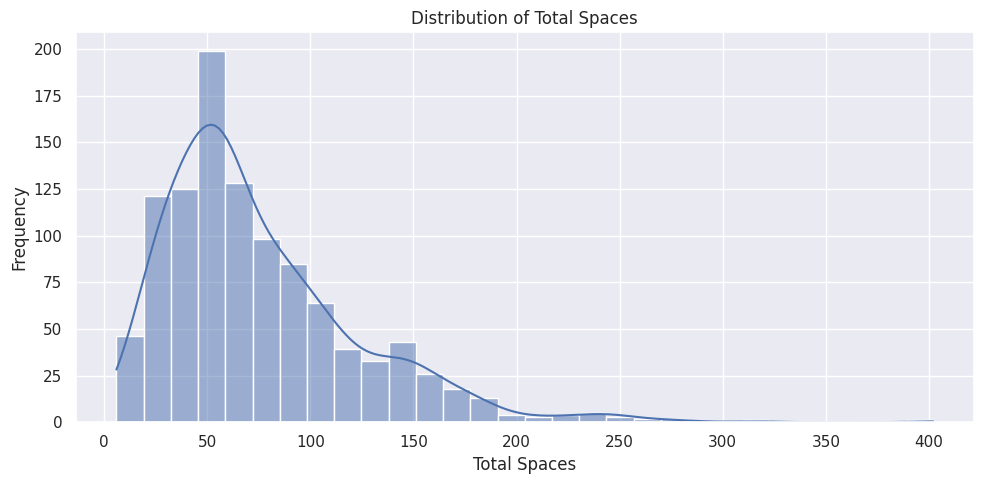

In [8]:
# 2. The distribution of Total Spaces (Histogram)
# Set the figure layout
plt.figure(figsize=(10,5))
sns.histplot(mydata_cleaned['TOTSPACE'], bins=30, kde=True)
# set the title
plt.title('Distribution of Total Spaces')
# set x and y labels
plt.xlabel('Total Spaces')
plt.ylabel('Frequency')
# set layout to avoid overlapping
plt.tight_layout()
# show the plot
plt.show()

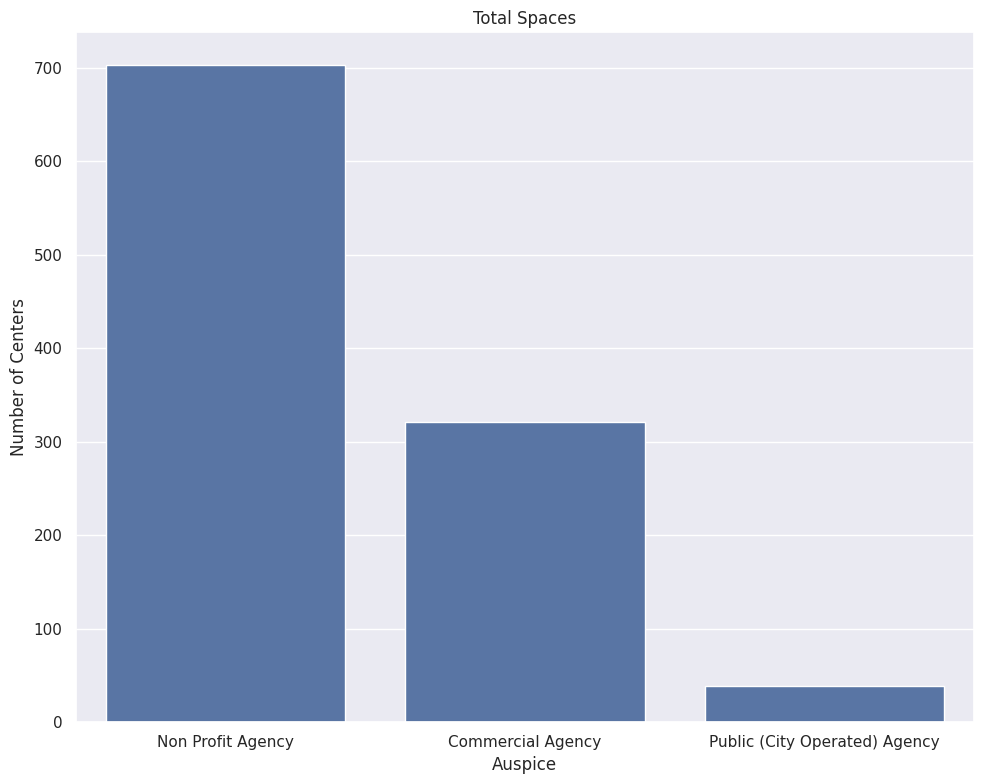

In [9]:
# 3. Examine the Child Care Centers by Auspice
plt.figure(figsize=(10,8))
auspice_ct = mydata_cleaned['AUSPICE'].value_counts()
# create the barplot
sns.barplot(x=auspice_ct.index, y=auspice_ct.values)
# set title for barplot
plt.title('Total Spaces')
# set the x and y labels
plt.xlabel('Auspice')
plt.ylabel('Number of Centers')
# set layout to avoid overlapping and show the plot
plt.tight_layout()
plt.show()

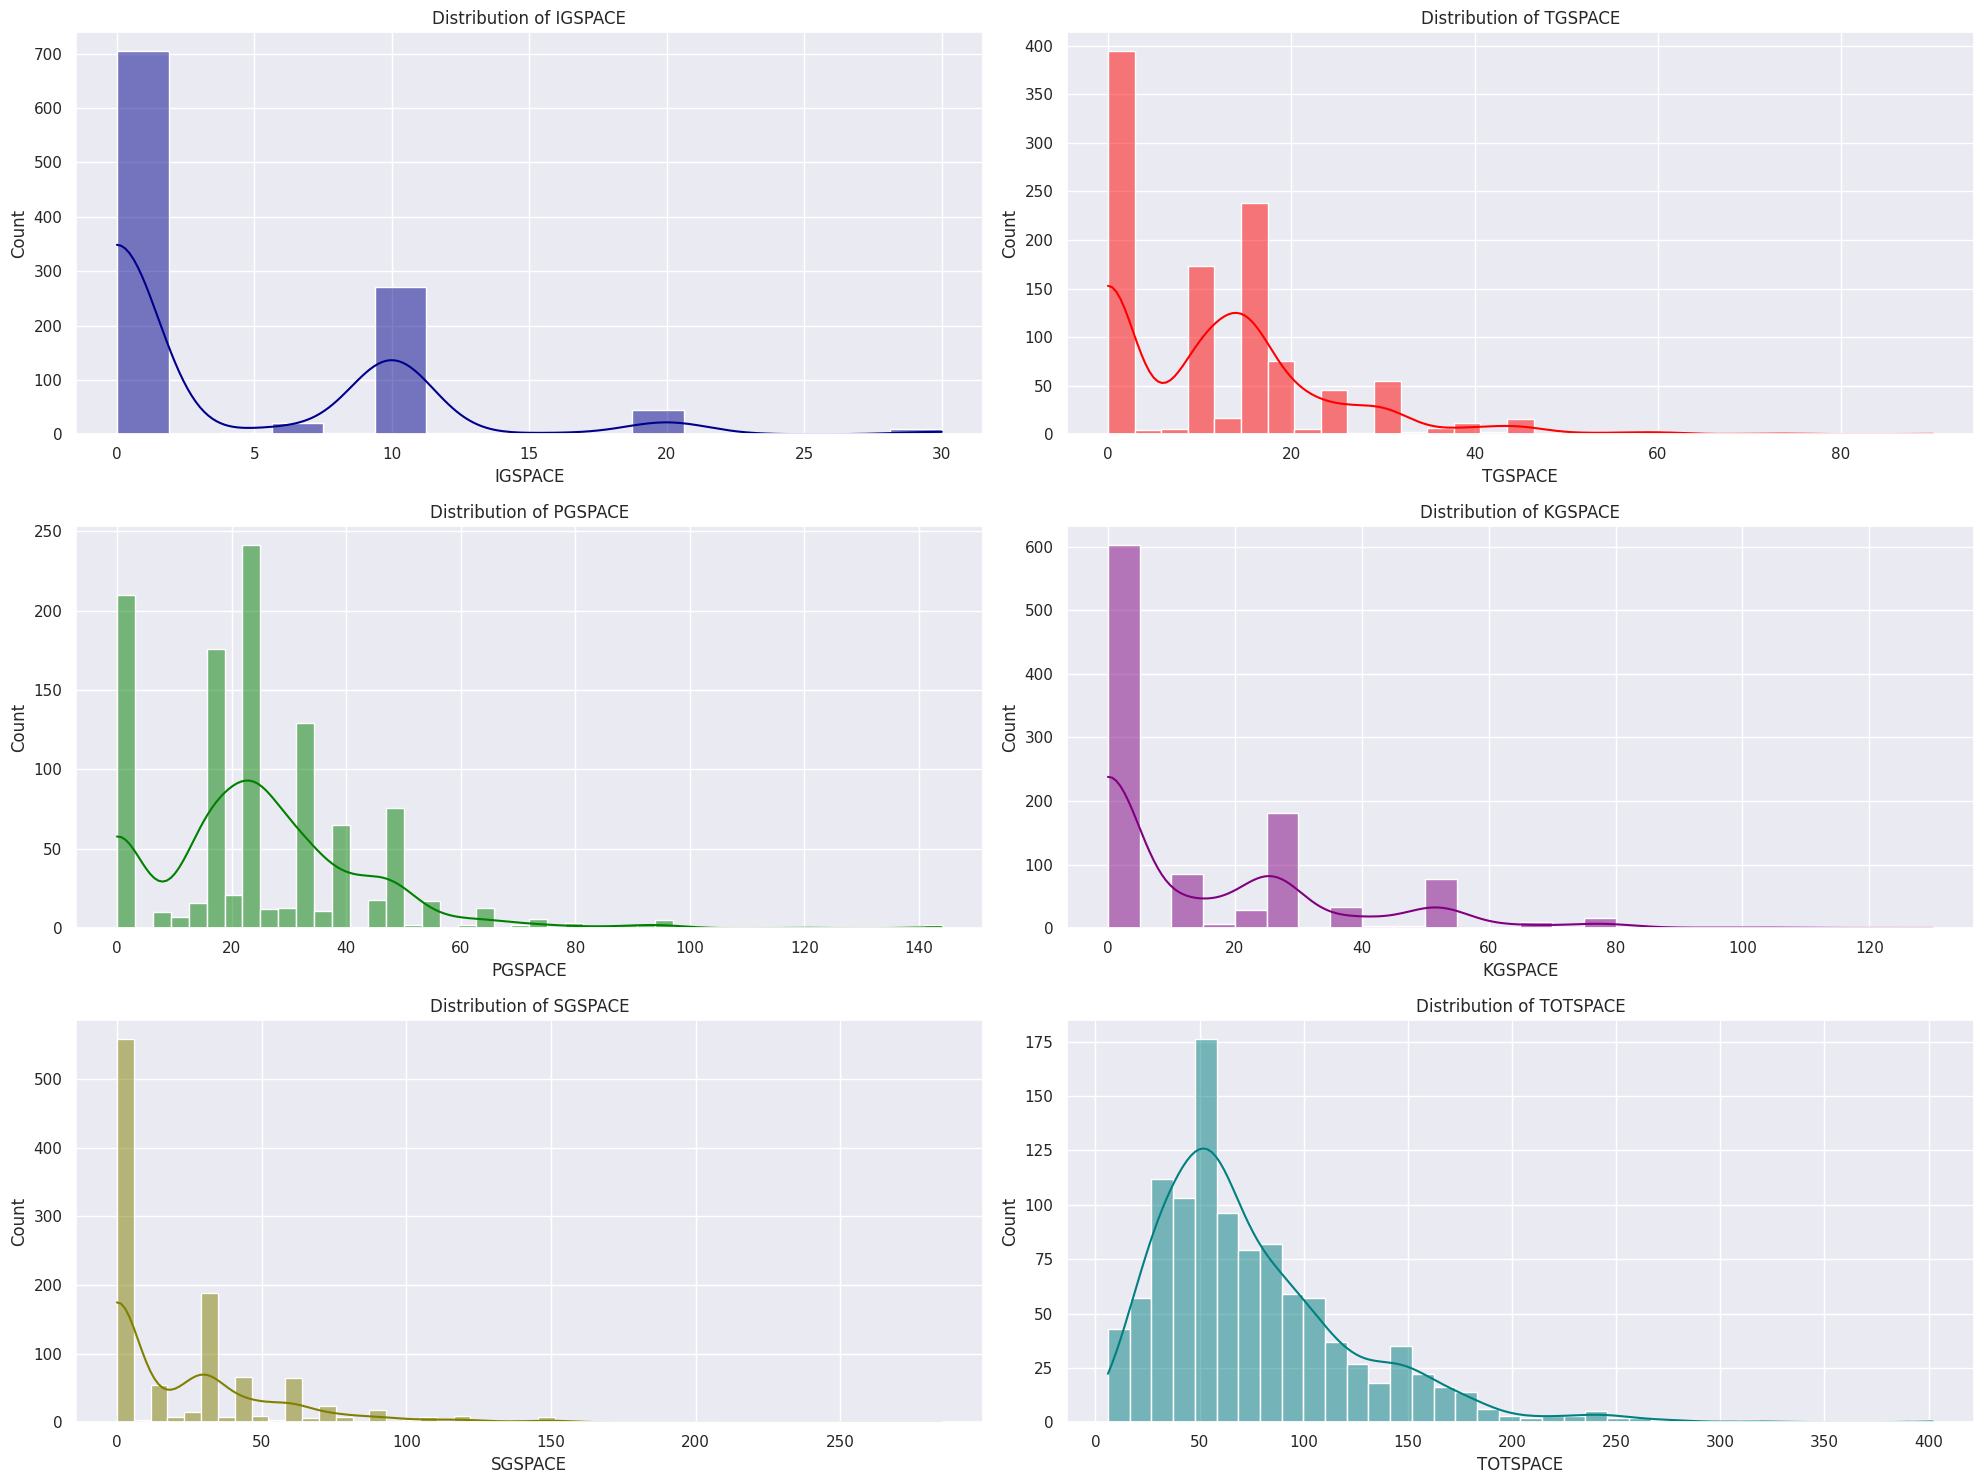

In [10]:
# Examine the numerical variables here!
# Setting the darkgrid background for the plots
sns.set(style='darkgrid')

# Preparing the figure layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Create the histograms for numerical variables
sns.histplot(mydata_cleaned['IGSPACE'], kde=True, ax=axes[0, 0], color='darkblue')
sns.histplot(mydata_cleaned['TGSPACE'], kde=True, ax=axes[0, 1], color='red')
sns.histplot(mydata_cleaned['PGSPACE'], kde=True, ax=axes[1, 0], color='green')
sns.histplot(mydata_cleaned['KGSPACE'], kde=True, ax=axes[1, 1], color='purple')
sns.histplot(mydata_cleaned['SGSPACE'], kde=True, ax=axes[2, 0], color='olive')
sns.histplot(mydata_cleaned['TOTSPACE'], kde=True, ax=axes[2, 1], color='teal')

# Set the titles for the histogram plots
axes[0,0].set_title('Distribution of IGSPACE')
axes[0,1].set_title('Distribution of TGSPACE')
axes[1,0].set_title('Distribution of PGSPACE')
axes[1,1].set_title('Distribution of KGSPACE')
axes[2,0].set_title('Distribution of SGSPACE')
axes[2,1].set_title('Distribution of TOTSPACE')

# Set layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

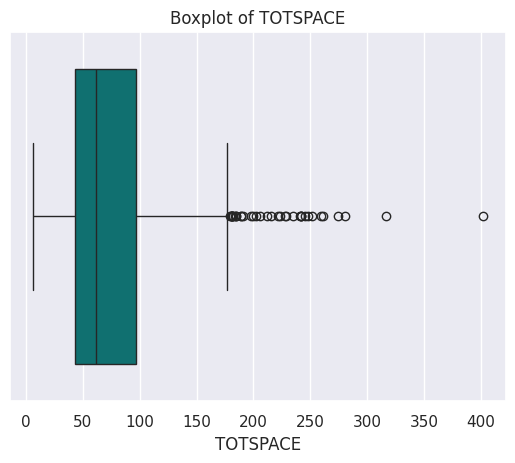

In [11]:
# Create the boxplot for showing the TOTSPACE
sns.boxplot(data = mydata_cleaned['TOTSPACE'], color='teal', orient='h')
# set the title and display the result
plt.title('Boxplot of TOTSPACE')
plt.show()

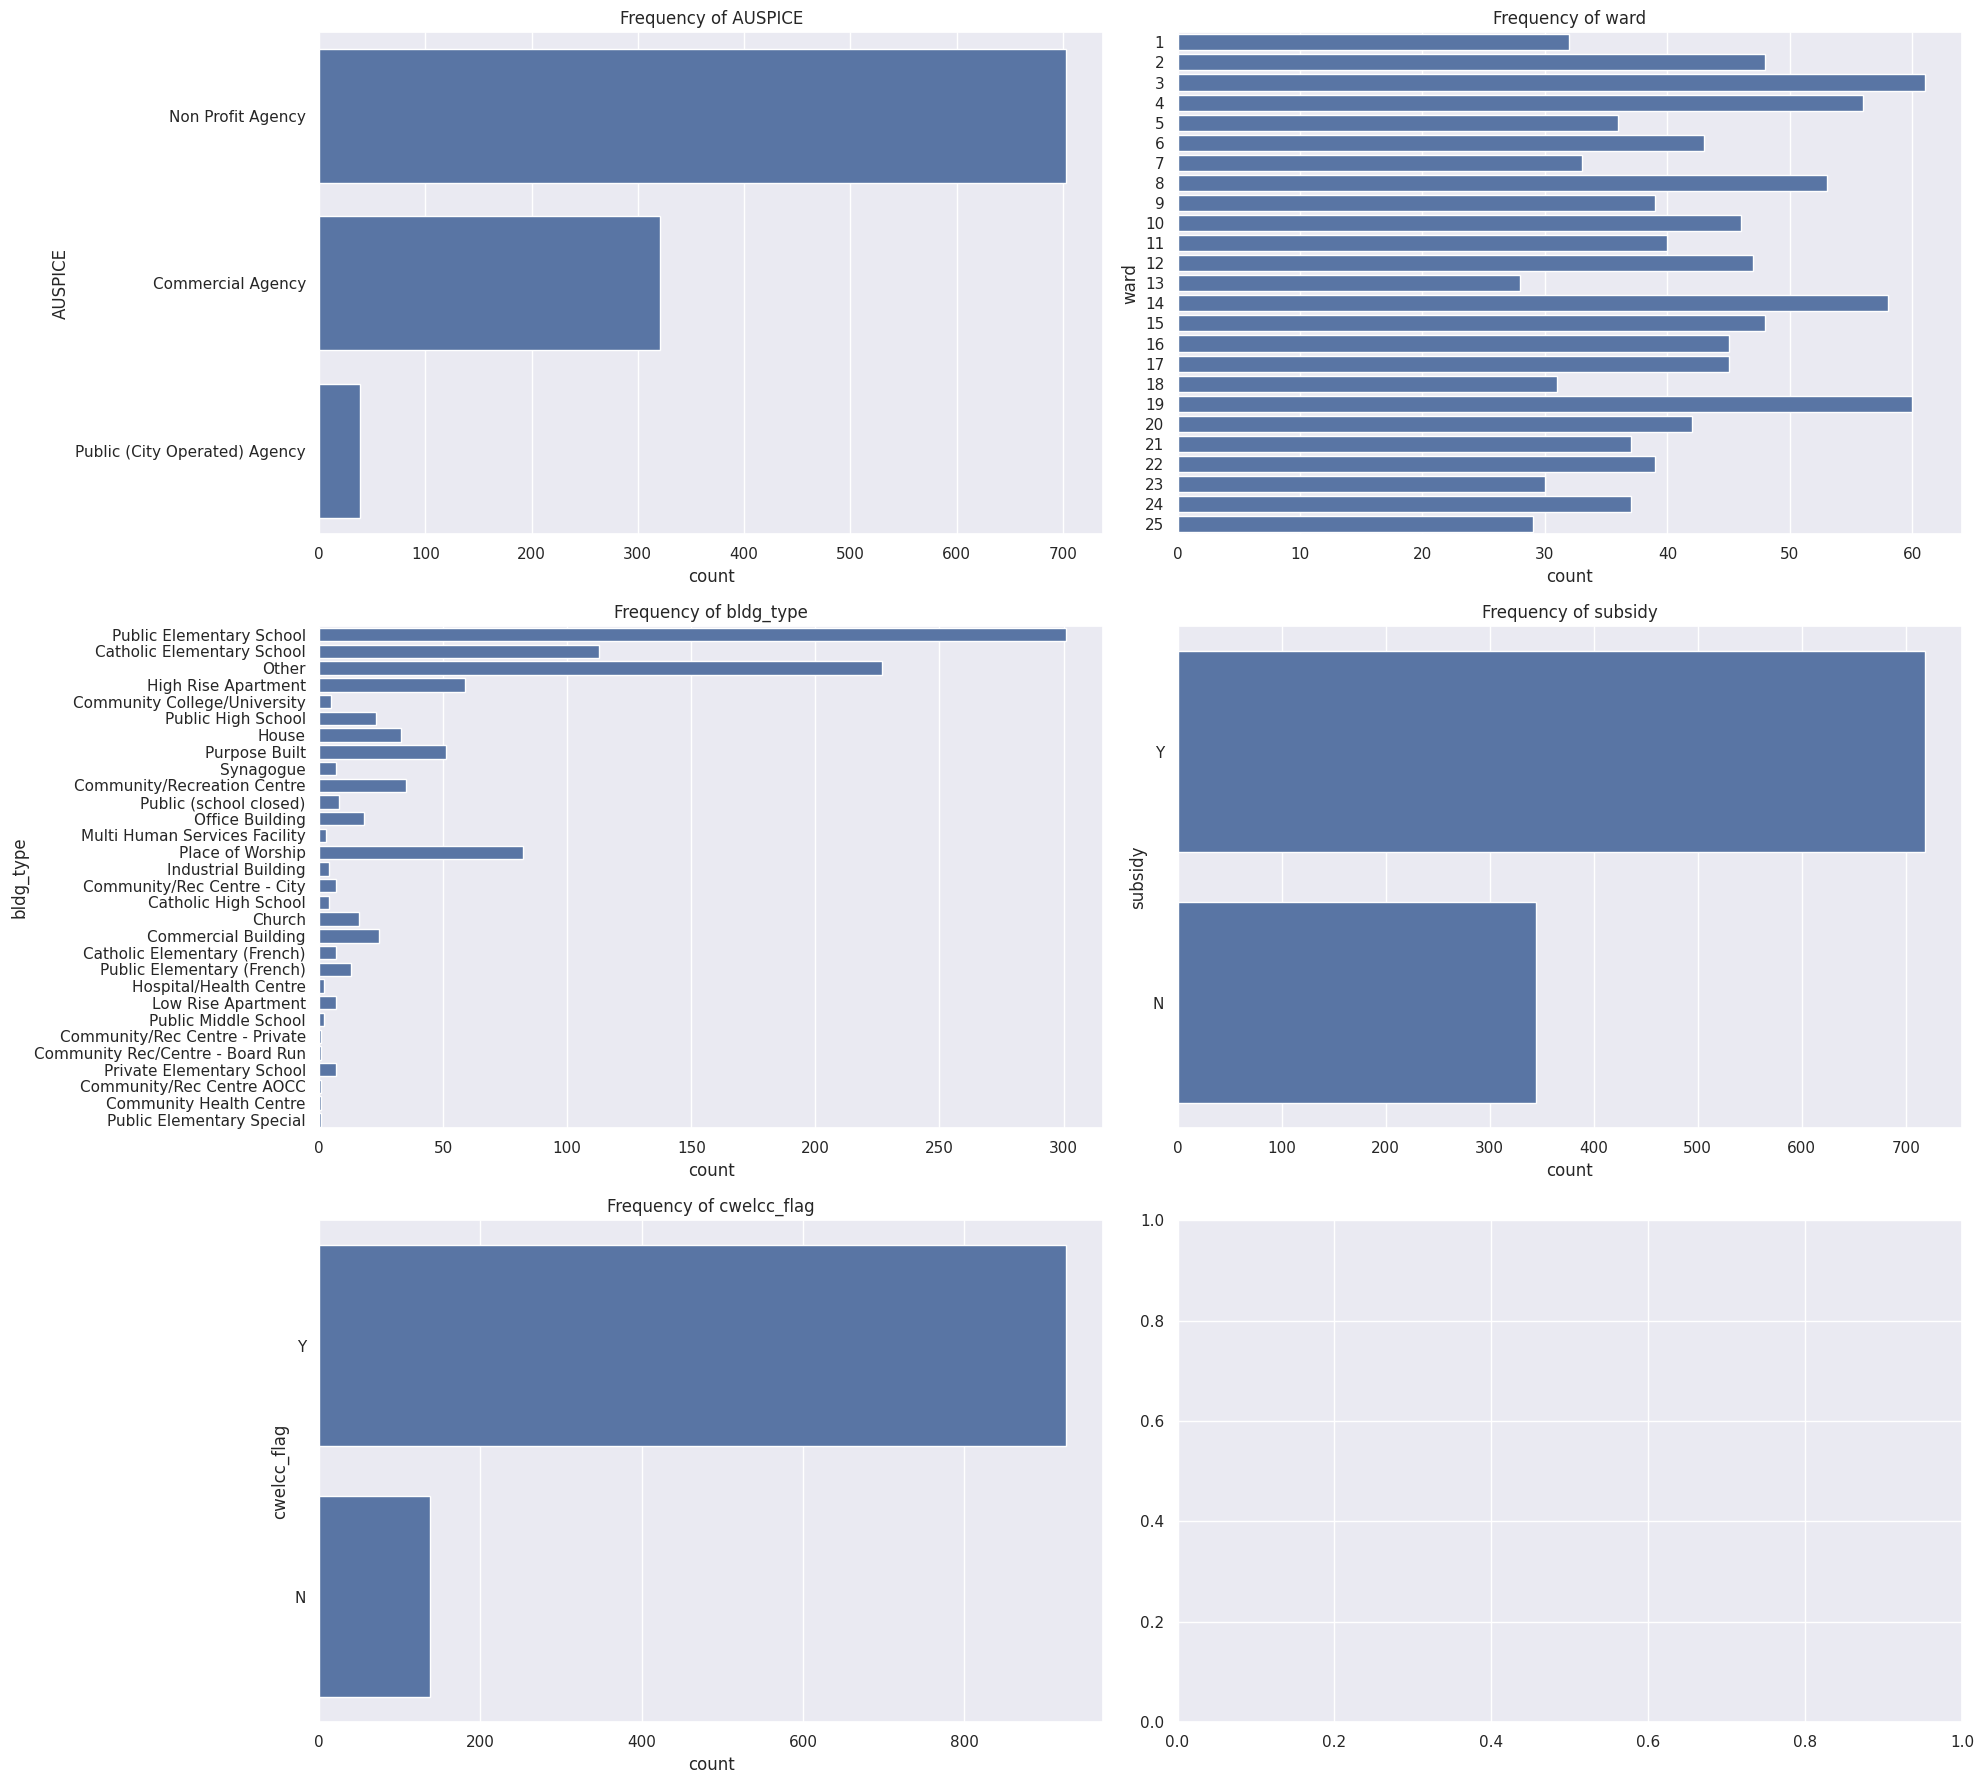

In [12]:
# preparing the figure layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# creating the barplots for categorical variables
sns.countplot(y=mydata_cleaned['AUSPICE'], ax=axes[0,0])
sns.countplot(y=mydata_cleaned['ward'], ax=axes[0,1])
sns.countplot(y=mydata_cleaned['bldg_type'], ax=axes[1,0])
sns.countplot(y=mydata_cleaned['subsidy'], ax=axes[1,1])
sns.countplot(y=mydata_cleaned['cwelcc_flag'], ax=axes[2,0])

# set the titles for the barplots
axes[0,0].set_title('Frequency of AUSPICE')
axes[0,1].set_title('Frequency of ward')
axes[1,0].set_title('Frequency of bldg_type')
axes[1,1].set_title('Frequency of subsidy')
axes[2,0].set_title('Frequency of cwelcc_flag')

# Set layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

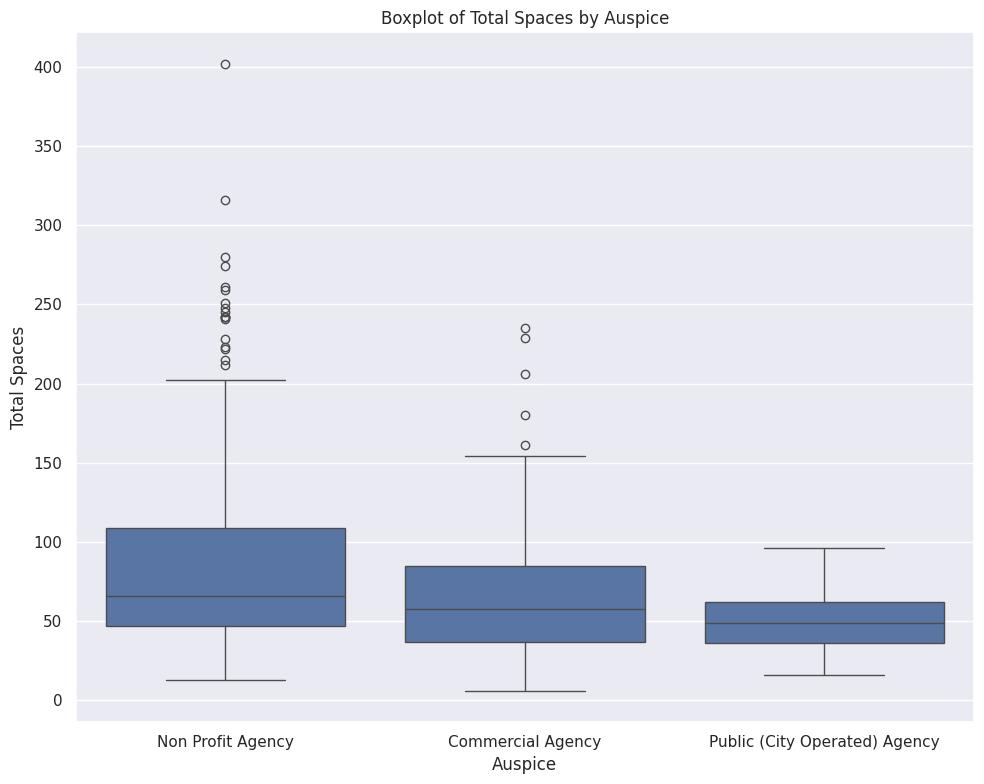

In [13]:
# creating the boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=mydata_cleaned[['AUSPICE','TOTSPACE']])
# set the boxplot title and xy labels
plt.title('Boxplot of Total Spaces by Auspice')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces')
# Set layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

# One-Way ANOVA Analysis

### To examine with one-way ANOVA analysis for whether the significant difference in the TOTSPACE of child care centers with different types of AUSPICE.

### Independent variable: AUSPICE, Dependent variable: TOTSPACE

In [14]:
# Examine whether there has the significant differences of Total Spaces in the different types of Auspice; Auspice is independent variable, and Total Spaces is dependent variable
data1 = mydata_cleaned[['AUSPICE', 'TOTSPACE']]
# Make sure there is an unique identifier for rows
# Reshape the dataframe suitable first
df_melt = data1.reset_index()
# Specify and fit the model, used Ordinary Least Square (OLS) model
modell = ols('TOTSPACE ~ C(AUSPICE)', data=df_melt).fit()
# Conduct ANOVA and show the ANOVA table
anova_result = sm.stats.anova_lm(modell, typ=2)
anova_result

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [17]:
# Use the groupby to get the average of Total Spaces by different Auspcies
tot_space_by_auspice = mydata_cleaned.groupby('AUSPICE')['TOTSPACE'].mean().reset_index()
tot_space_by_auspice

,AUSPICE,TOTSPACE
0,Commercial Agency,64.984424
1,Non Profit Agency,82.103841
2,Public (City Operated) Agency,47.769231


In [18]:
# Used the 'stat' function
resl = stat()
resl.anova_stat(df=df_melt, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
# Get the ANOVA summary
resl.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Conduct the Tukey's HSD test for post-hoc comparison
tukey_rest = pairwise_tukeyhsd(mydata_cleaned['TOTSPACE'], mydata_cleaned['AUSPICE'], alpha=0.05)  # set significance level at 0.05 or 5%
tukey_rest.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,17.1194,0.0,9.7037,24.5351,True
Commercial Agency,Public (City Operated) Agency,-17.2152,0.0779,-35.8832,1.4528,False
Non Profit Agency,Public (City Operated) Agency,-34.3346,0.0,-52.4448,-16.2244,True


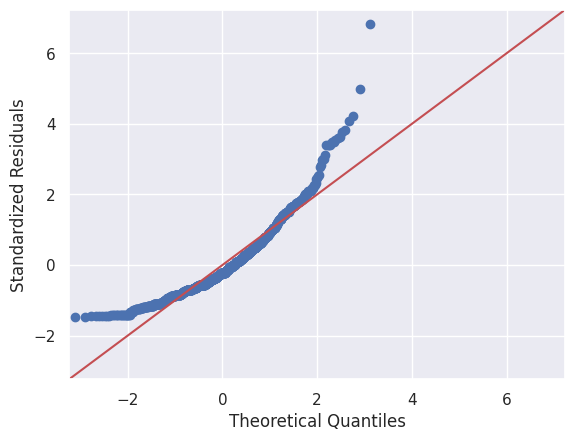

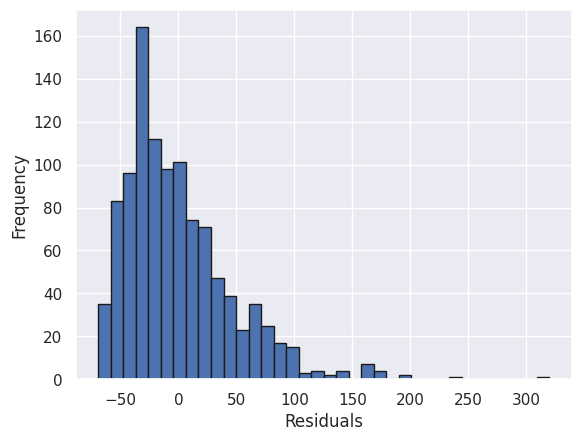

In [20]:
# Checking model assumptions
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: resl.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(resl.anova_std_residuals, line='45')
# set the x and y labels
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
# display the plot
plt.show()

# Create the histogram
plt.hist(resl.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
# set the x and y labels
plt.xlabel("Residuals")
plt.ylabel('Frequency')
# show the plot
plt.show()

In [21]:
# Shapiro-Wilk is used to test whether the data is normal distribution or not
# w range is from 0 to 1, if the w value close to 1, indicating the sample data is close to normal distribution
# p-value is a parameter used to test the statistical significant and whether or not reject the null hypothesis
w, pvalue = stats.shapiro(modell.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [22]:
# We know the sample data not satisfy the normal distribution assumption; we need use Levene's Test to check the assumption of homogeneity of variances, since Levene's Test is robust if the normal distribute assumption not satisfy.

In [23]:
# Assumption 2: Homogeneity of variances: Bartlett's test if the sample data is normal distribution
resl.bartlett(df=df_melt,res_var='TOTSPACE', xfac_var='AUSPICE')
resl.bartlett_summary

,Parameter,Value
0,Test statistics (T),89.586
1,Degrees of freedom (Df),2.000
2,p value,0.000


In [24]:
# Assumption 2: Homogeneity of variances: Levene's test if the sample data is not normal distribution
resl.levene(df=df_melt, res_var='TOTSPACE', xfac_var='AUSPICE')
resl.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


##### According to Shapiro-Wilk test that the sample data is not normal distribution, which means the Levene's test more reliable for the the result of homogeneity of variances

### Use one-way ANOVA analysis to investigate whether there has significant differences of TOTSPACE with the different types of building. And extract them into five different categories.

In [25]:
# Define a mapping function for the broader categories
dfff = mydata_cleaned.copy()
def classify_bldg_type(bldg_type):
  if "School" in bldg_type or "University" in bldg_type or "College" in bldg_type:
    return "Schools"
  elif "Apartment" in bldg_type or bldg_type == "House":
    return "Residential Buildings"
  elif "Community" in bldg_type or "Recreation" in bldg_type:
    return "Community and Recreation Centers"
  elif "Worship" in bldg_type or "Church" in bldg_type or "Synagogue" in bldg_type:
    return "Places of Worship"
  else:
    return "Commercial and Other Buildings"

# Apply the classification
dfff['bldg_category'] = dfff['bldg_type'].apply(classify_bldg_type)

# Groupby the new category and get the mean of TOTSPACE for each category
tot_space_by_category = dfff.groupby('bldg_category')['TOTSPACE'].mean().reset_index()
tot_space_by_category

,bldg_category,TOTSPACE
0,Commercial and Other Buildings,67.189944
1,Community and Recreation Centers,65.347826
2,Places of Worship,52.809524
3,Residential Buildings,60.656566
4,Schools,91.938462


In [27]:
data2 = dfff[['bldg_category','TOTSPACE']]
# reshape the dataframe suitable
df_melt_type = data2.reset_index()  # make sure there is an unique identifier for rows
# specify and fit the model, using OLS (Ordinary Least Square)
modelll = ols('TOTSPACE ~ C(bldg_category)', data=df_melt_type).fit()
# display the ANOVA table
anova_result1 = sm.stats.anova_lm(modelll, typ=2)
anova_result1

,sum_sq,df,F,PR(>F)
C(bldg_category),2.282551e+05,4.0,27.443454,1.060208e-21
Residual,2.199922e+06,1058.0,NaN,NaN


In [28]:
# use the 'stat' function
res_type = stat()

# Get the ANOVA summary
res_type.anova_stat(df=df_melt_type, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(bldg_category)')
res_type.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(bldg_category),4.0,2.282551e+05,57063.767476,27.443454,1.060208e-21
Residual,1058.0,2.199922e+06,2079.321653,NaN,NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# conduct the Tukey's HSD test for post-hoc comparison
tukey_rest1 = pairwise_tukeyhsd(dfff['TOTSPACE'], dfff['bldg_category'], alpha=0.05) # assume the significance level at 5% or 0.05
tukey_rest1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial and Other Buildings,Community and Recreation Centers,-1.8421,0.999,-21.358,17.6738,False
Commercial and Other Buildings,Places of Worship,-14.3804,0.0369,-28.2089,-0.552,True
Commercial and Other Buildings,Residential Buildings,-6.5334,0.7148,-20.6821,7.6154,False
Commercial and Other Buildings,Schools,24.7485,0.0,15.9458,33.5512,True
Community and Recreation Centers,Places of Worship,-12.5383,0.5267,-34.5693,9.4927,False
Community and Recreation Centers,Residential Buildings,-4.6913,0.9785,-26.9247,17.5422,False
Community and Recreation Centers,Schools,26.5906,0.0016,7.313,45.8682,True
Places of Worship,Residential Buildings,7.847,0.7348,-9.608,25.3021,False
Places of Worship,Schools,39.1289,0.0,25.6389,52.619,True
Residential Buildings,Schools,31.2819,0.0,17.4637,45.1001,True


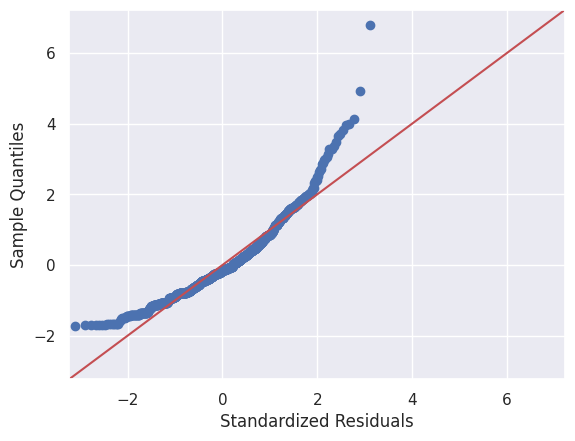

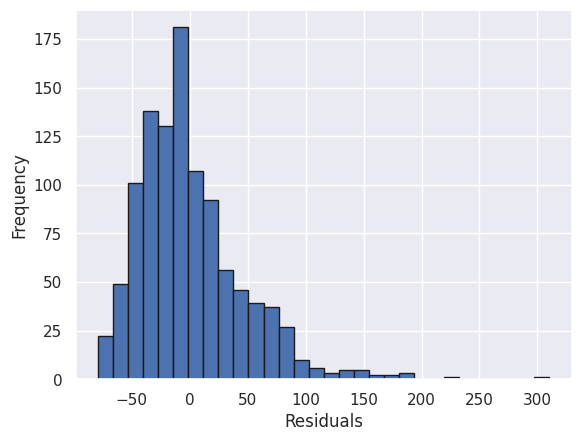

In [30]:
# Checking model assumptions
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: res_type.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res_type.anova_std_residuals, line='45')
# set the x and y labels
plt.xlabel('Theoretical Quantiles')
plt.xlabel('Standardized Residuals')
# show the plot
plt.show()

# create a histogram
plt.hist(res_type.anova_model_out.resid, bins=30, histtype='bar', ec='k')
# set the x and y labels
plt.xlabel('Residuals')
plt.ylabel('Frequency')
# display the plot
plt.show()

In [31]:
# Shapiro-Wilk Test
w, pvalue = stats.shapiro(modelll.resid)
w, pvalue

(0.9245465993881226, 1.1532457285444392e-22)

In [32]:
# Assumption 2: Homogeneity of variances: Levene's test if the sample data is not normal distribution (We can see the result above)
res_type.levene(df=df_melt_type, res_var='TOTSPACE', xfac_var='bldg_category')
res_type.levene_summary

,Parameter,Value
0,Test statistics (W),25.7323
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


# Two-way ANOVA Analysis

### Two-way ANOVA analysis was used to test whether different types of AUSPICE and building categories had a significant difference on the TOTSPACE in child care centers. (whether there was an interaction between these two factors)

In [33]:
# specify and fit the model, use OLS (Ordinary Least Square)
model_two = ols('TOTSPACE ~ C(AUSPICE) + C(bldg_category) + C(AUSPICE):C(bldg_category)', data=dfff).fit()

# show the ANOVA table
anova_table_two = sm.stats.anova_lm(model_two, typ=2)
anova_table_two

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.954850e+04,2.0,4.742216,2.965338e-02
C(bldg_category),1.988417e+05,4.0,24.118222,4.264954e-15
C(AUSPICE):C(bldg_category),1.814158e+04,8.0,1.100229,3.605600e-01
Residual,2.162110e+06,1049.0,NaN,NaN


In [34]:
# use the stat() function and get the summary of ANOVA table
res = stat()
res.anova_stat(df=dfff, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(bldg_category) + C(AUSPICE):C(bldg_category)')
res.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.954850e+04,9774.251744,4.742216,2.965338e-02
C(bldg_category),4.0,1.988417e+05,49710.427648,24.118222,4.264954e-15
C(AUSPICE):C(bldg_category),8.0,1.814158e+04,2267.697535,1.100229,3.605600e-01
Residual,1049.0,2.162110e+06,2061.114919,NaN,NaN


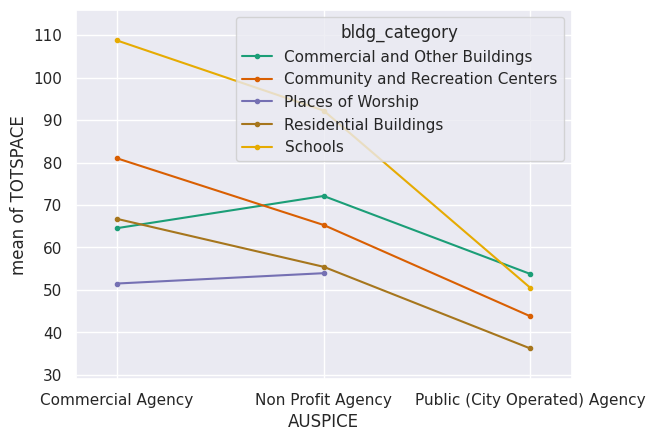

In [35]:
# import packages first
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig1 = interaction_plot(x=dfff['AUSPICE'],trace=dfff['bldg_category'],response=dfff['TOTSPACE'], colors=['#1b9e77','#d95f02','#7570b3','#a6761d','#e6ab02'])
# show the plot
plt.show()

In [36]:
# conduct the Tukey's HSD test for post-hoc comparisons
res.tukey_hsd(df=dfff, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(bldg_category) + C(AUSPICE):C(bldg_category)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.941487,24.297347,7.916497,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.805034,51.864185,6.501357,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.854295,35.284681,3.162346,0.065763


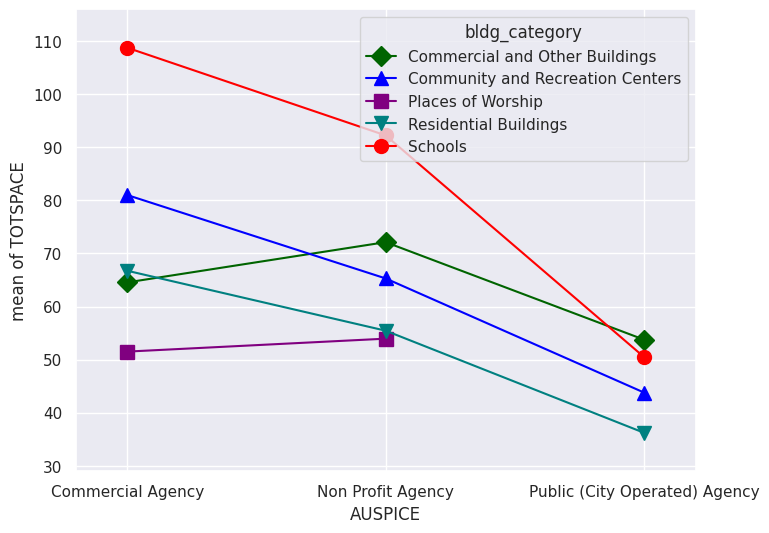

In [37]:
# set the figure size
fig, ax = plt.subplots(figsize=(8,6))

fig2 = interaction_plot(x=dfff['AUSPICE'],trace=dfff['bldg_category'],response=dfff['TOTSPACE'],colors=['darkgreen','blue','purple','teal','red'],markers=['D','^','s','v','o'],ms=10,ax=ax)
